# Machine Learning Project :

### Predicting home price in tunisia 

    - Developer : imhamed boujemaa
    - Class : RAIA 


### importing librairies 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

## First Steps : 

### Data Load: Load Tunisian home prices into a dataframe


In [5]:
df = pd.read_csv('dataset_clean.csv')

### EDA : exploratory data analysis 

    - including data visualization & data cleaning

In [6]:
df.head() #See the first rows of the data

,Unnamed: 0,id,price_tnd,price_eur,location,city,governorate,Area,pieces,room,...,garden,concierge,beach_view,mountain_view,pool,elevator,furnished,equipped_kitchen,central_heating,air_conditioning
0,1,863e62e5-0bfe-49f3-ad97-e0ae91be68e9,3250000.0,1007500.0,El Kantaoui,Hammam Sousse,Sousse,1000.0,26.0,16.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
1,5,67e06050-57c0-4665-8a2e-a9010b578e4a,1000000.0,310000.0,Sousse Riadh,Sousse Riadh,Sousse,1000.0,23.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11,da303b71-fba9-42e9-a236-16ec176309d9,1200000.0,372000.0,Bou Mhel,Boumhel Bassatine,Ben Arous,510.0,18.0,14.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,16,ffc63109-309e-4026-aecf-6ccb22447c38,950000.0,294500.0,El Gourjani,Tunis,tunis,538.0,17.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18,12c80a59-8f9d-4cee-9554-eeae7aa3ab9c,650000.0,201500.0,Raoued,Raoued,Ariana,400.0,17.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [7]:
df.shape #data shape

(2458, 27)

In [8]:
df.columns

Index(['Unnamed: 0', 'id', 'price_tnd', 'price_eur', 'location', 'city',
       'governorate', 'Area', 'pieces', 'room', 'bathroom', 'age', 'state',
       'latt', 'long', 'distance_to_capital', 'garage', 'garden', 'concierge',
       'beach_view', 'mountain_view', 'pool', 'elevator', 'furnished',
       'equipped_kitchen', 'central_heating', 'air_conditioning'],
      dtype='object')

In [14]:
df.governorate.unique()

array([' Sousse', 'Ben Arous', 'tunis', 'Ariana', 'Nabeul', 'Mahdia',
       'Djerba', 'La Manouba', 'Sfax', 'Jendouba', 'Bizerte', 'Gabès',
       'Béja', 'Kébili', 'Monastir'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='governorate'>

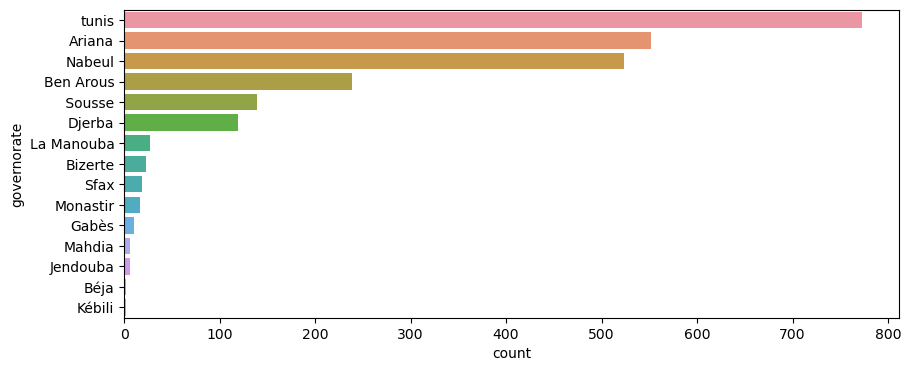

In [19]:
plt.figure(figsize=(10, 4))
sns.countplot(data = df, y = 'governorate', order = df.governorate.value_counts().index)

### Drop features that are not required to build our model

In [20]:
df.isnull().sum()

Unnamed: 0             0
id                     0
price_tnd              0
price_eur              0
location               0
city                   0
governorate            0
Area                   0
pieces                 0
room                   0
bathroom               0
age                    0
state                  0
latt                   0
long                   0
distance_to_capital    0
garage                 0
garden                 0
concierge              0
beach_view             0
mountain_view          0
pool                   0
elevator               0
furnished              0
equipped_kitchen       0
central_heating        0
air_conditioning       0
dtype: int64

#### important Note : as we can see , we don't have any missing values in our data 

In [49]:
df1 = df.drop(['Unnamed: 0','id','price_eur','location','city','age','state','latt','long','distance_to_capital','concierge','beach_view','mountain_view'], axis='columns')

In [50]:
df1.shape

(2458, 14)

In [51]:
df1.head()

,price_tnd,governorate,Area,pieces,room,bathroom,garage,garden,pool,elevator,furnished,equipped_kitchen,central_heating,air_conditioning
0,3250000.0,Sousse,1000.0,26.0,16.0,14.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
1,1000000.0,Sousse,1000.0,23.0,16.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1200000.0,Ben Arous,510.0,18.0,14.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,950000.0,tunis,538.0,17.0,16.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,650000.0,Ariana,400.0,17.0,9.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


### Use One Hot Encoding For governorate


In [53]:
dummies = pd.get_dummies(df1.governorate)
dummies.head(10)

,Sousse,Ariana,Ben Arous,Bizerte,Béja,Djerba,Gabès,Jendouba,Kébili,La Manouba,Mahdia,Monastir,Nabeul,Sfax,tunis
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [55]:
df2 = pd.concat([df1,dummies],axis='columns')
df2.head(5)

,price_tnd,governorate,Area,pieces,room,bathroom,garage,garden,pool,elevator,...,Djerba,Gabès,Jendouba,Kébili,La Manouba,Mahdia,Monastir,Nabeul,Sfax,tunis
0,3250000.0,Sousse,1000.0,26.0,16.0,14.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1000000.0,Sousse,1000.0,23.0,16.0,9.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1200000.0,Ben Arous,510.0,18.0,14.0,4.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,950000.0,tunis,538.0,17.0,16.0,5.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,650000.0,Ariana,400.0,17.0,9.0,4.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df3 = df2.drop('governorate',axis='columns')
df3.head(5)

,price_tnd,Area,pieces,room,bathroom,garage,garden,pool,elevator,furnished,...,Djerba,Gabès,Jendouba,Kébili,La Manouba,Mahdia,Monastir,Nabeul,Sfax,tunis
0,3250000.0,1000.0,26.0,16.0,14.0,1.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1000000.0,1000.0,23.0,16.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1200000.0,510.0,18.0,14.0,4.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,950000.0,538.0,17.0,16.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,650000.0,400.0,17.0,9.0,4.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


## Second Steps : 

### Build a Model